
Estudante: José Henrique Targino Dias Góis <br>
Matrícula: 201800575678


# Header

In [21]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "exercicio2"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

# Teoria

<img src='./e03_fucn.png'/>

<b> a. Supondo um problema de Classificação (Classe A e Classe B) e você tenha modelado a solução com k = 10 e v = 1. Como você interpretaria a resposta do modelo em relação às duas possíveis classes? </b>

A resposta do modelo deveria ser tal que deveria polarizar os  elementos das classes em seus extremos opóstos, por exemplo, assumir quão mais próximo de $-\infty$ são pertencentes a classe A e pertencentes a classe B ao se aproximar de $+\infty$.

<b> b. O que você faria caso desejasse minimizar concomitantemente as ocorrências de FP e FN? </b>

Evitar que os valores para os elementos da classe A se sobreponham com os da classe B, ou seja, obter valores para instâncias da classe A perto de instâncias da classe B e vice-versa.

<b> c. É viável definir uma interpretação que minimize a ocorrência apenas de FP ou FN? Como? </b>


A medida que nosso algorítmo consegue afastar as observações de A da classificação de B  mas não consegue afastar as observações de B da classificação de A. Isso diminuiria os Falsos A positivos, mas deixaria os Falsos negativos de B inmutáveis.

<b> d. Caso na modelagem o projetista tenha optado por representar a solução do problema com v = 2, Como você interpretaria a resposta como sendo Classe A ou B? </b>

É possível que no espaço $\mathbb{R}^2$ poderíamos denotar as dimensões como um espaço métrico de distâncias ao centro das classes. De forma que a primeira coluna poderia ser a distancia da observação a classe A e a segunda coluna a distância a classe B, e aquela com a menor distância seria a que possuiria aquele elemento.

<b> e. Uma boa prática, em problemas de classificação, é modelar o vetor de saída com uma dimensão igual ao número de classes. Nesses casos, como são definidas as respostas para cada classe? Que característica importante possui essa forma de representação?  </b>

Essa característica expande a quantidade de classes que são possívelmente representadas.

<b> f. Suponha que você após o treino você aplique o modelo sobre o próprio conjunto de treino e obtenha como resposta a seguinte matriz de confusão: </b>


<img src='./e03_tab.png'/>

In [25]:
class conf_matrix():
    def __init__(self,table,labels=''):
        import numpy as np
        
        self.table = table;
        self.n     = np.sum(self.table)
        self.labels = labels;
        self.group_n = np.sum(self.table,axis=0)
        if not labels:
            self.labels = [chr(65+x) for x in range(len(table))];
        
        
        self.acuracia   = np.sum(np.diag(self.table))/np.sum(self.table)
   
        if self.table.shape==(2,2):
            self.precisao_p = self.table[0,0]/np.sum(self.table[0,:])
            self.precisao_n = self.table[1,1]/np.sum(self.table[1,:])
            self.taxa_fp    = self.table[0,1]/np.sum(self.table[:,1])
            self.taxa_fn    = self.table[1,0]/np.sum(self.table[:,0])
    
    def summary(self,fields=[]):
        print('== Summary ==',end='')
        
        if not fields:
            fields = [key for key in self.__dict__ if key not in ['labels','table']]
        
        for field in fields:
            print('\n')
            print('+ {} field'.format(field))
            for col,label in enumerate(self.labels):
                temp = self.confusion(col)
                print('Label {0} =\t{1:.2f}'.format(label,100*temp.__dict__[field]))
            
    def confusion(self,col):
        import numpy as np

        L   = np.concatenate((self.table[:col,:col],self.table[(col+1):,:col]))
        R   = np.concatenate((self.table[:col,(col+1):],self.table[(col+1):,(col+1):]))

        TN  = np.concatenate((L,R),axis=1)
        TN  = np.sum(TN)

        TP  = self.table[col,col]

        FP  = np.concatenate((self.table[col,:col],self.table[col,(col+1):]))
        FP  = np.sum(FP)

        FN  = np.concatenate((self.table[:col,col],self.table[(col+1):,col]))
        FN  = np.sum(FN)

        table = np.array([[TP,FP],[FN,TN]])
        
        return conf_matrix(table,['P'+self.labels[col],'N'+self.labels[col]])
    
    def __repr__(self):
        import numpy as np
        for key in self.__dict__:
            print(key,end=' =\t')
            if key not in ['labels','table','group_n','n']:
                print('{0:.2f}%'.format(100*self.__dict__[key]));
            else:
                print(self.__dict__[key])
        return ''

<b>a. Qual o tamanho do conjunto de treino e o número de exemplos de cada classe? <br> <br></b>

In [23]:
import numpy as np

ED      = np.array([[70,5,0,3,1],[6,65,8,0,2],[3,10,75,1,0],[1,3,2,95,2],[5,0,1,1,100]])
ED      = conf_matrix(ED)

ED_mean = np.mean(ED.group_n)
ED_std  = np.std(ED.group_n)
print('Número de amostras total= {}'.format(ED.n))
print('Número de amostras por grupo:')
print(', '.join([x+'='+str(y) for (x,y) in zip(ED.labels,ED.group_n)]))

Número de amostras total= 459
Número de amostras por grupo:
A=85, B=83, C=86, D=100, E=105


459, sendo 85 da classe A, 83 da classe B,  86 da classe C, 100 da classe D e 105 da classe E <br><br>

<b>b. O treino usa as classes de forma balanceada? <br> <br></b>

In [24]:
print('Análise de amostras')
print('Média =\t{0:.2f}'.format(ED_mean))
print('Desvio padrão =\t{0:.2f}'.format(ED_std))
print('Razão =\t{0:.2f}%'.format(100*ED_std/ED_mean))

Análise de amostras
Média =	91.80
Desvio padrão =	8.93
Razão =	9.73%


Sim, o número de amostra de cada classe variou entre 83 e 105 amostras, com número de amostra média de 91.8 e o desvio padrão 8.9. Sendo o desvio padrão 9.7% da média, na minha interpretação, afirmo que elas estão bem balanceadas.
<br><br>

<b>c. Qual a acurácia alcançada no treino? <br> <br></b>

In [814]:
print('Acurácia =\t{0:.2f}%'.format(100*ED.acuracia))

Acurácia =	88.24%


Sendo a acurácia a porcentagem de acertos, e sendo acertos quando a classe desejada é igual a classe estimada, ou seja a diagonal da matriz descrita. Das 459, 405 amostras foram classificadas de forma correta. Representando uma acurácia de 88.24%.
<br><br>

<b>d. Qual a classe melhor aprendida pelo modelo? <br> <br></b>

In [815]:
ED.summary(['acuracia'])

== Summary ==

+ acuracia field
Label A =	94.77
Label B =	92.59
Label C =	94.55
Label D =	97.17
Label E =	97.39


Adotando a métrica de acurácia como escala de melhor classe, a <i><b> classe E </b></i> atingindo a acurácia em 97.38%.
<br><br>

<b>e. Considerando a classe C, qual a taxa de FP e de FN? </b>

In [816]:
ED.confusion(2)

table =	[[ 75  14]
 [ 11 359]]
n =	459
labels =	['PC', 'NC']
group_n =	[ 86 373]
acuracia =	94.55%
precisao_p =	84.27%
precisao_n =	97.03%
taxa_fp =	3.75%
taxa_fn =	12.79%


Para a classe C a $\text{taxa de falso positivos} = 3.75\%$ e a $\text{taxa de falso negativo} = 12.79\%$.

<b>f. Qual a precisão no reconhecimento da classe A? <br> <br></b>
A precisão da classe A é igual a razão do número de verdadeiros positivos e a soma dos verdadeiros e falsos positivos para A. $\frac{70}{70 + 15} = 82.35\%$.
<br><br>

# Prática

<b> A partir do arquivo de dados em anexo – DL_Teste02, cujo problema é o diagnóstico do câncer de mama, realize as operações a seguir e forneça os resultados obtidos </b>

In [6]:
import pandas as pd

Dados = pd.read_excel('./DL03_Teste02_Dados.xlsx')
Dados = Dados.iloc[1:].reset_index().drop('Unnamed: 10',axis=1).drop('Unnamed: 12',axis=1).drop('index',axis=1)

<b> a. Verifique os dados do problema e defina quem você quer considerar diagnóstico positivo e quemconsiderar negativo.  </b> <br> <br>

In [7]:
Dados.Diagnóstico.value_counts()

4.0    444
2.0    239
Name: Diagnóstico, dtype: int64

O valor Diagnóstico assume dois valores,  4.0 e 2.0. Eu assumirei que 4.0 é o diagnóstico positivo e 2.0 diagnóstico negativo.

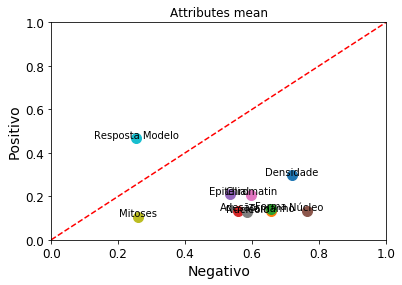

In [29]:
Positivo =   Dados[Dados.Diagnóstico==4.0]
Negativo =   Dados[Dados.Diagnóstico==2.0]

cont = 0
for key in Dados:
    if key not in ['Código', 'Diagnóstico']:
        x = Negativo[key].mean();
        y = Positivo[key].mean();
        z = key
        ax = plt.plot(x,y,'o',markersize=10)
        plt.text(x,y,z,horizontalalignment='center')#,verticalalignment='center')
        
plt.ylabel('Positivo');
plt.xlabel('Negativo');
plt.title('Attributes mean');
plt.xlim((0,1))
plt.ylim((0,1))
plt.plot([0,1],[0,1],'r--');

<b> b. Considerando o número de exemplos disponíveis, que estratégia você usaria para definir os conjuntos de treino, validação e teste? </b> <br> <br>

Para evitar o enviesamento do treino, validação e/ou teste, eu deveria tomar partições homogeneas dos dados. Para tanto eu utilizaria do método de k-fold randomizado. Dividir os dados em partições de mesmo tamanho com elementos aleatórios.

In [9]:
from sklearn.model_selection import KFold
k  = 5
kf = KFold(n_splits=k,shuffle=True)
for train_id,test_id in kf.split(Dados):
    print(len(test_id),len(train_id))

137 546
137 546
137 546
136 547
136 547


<b> c. Fazendo de contas que a planilha contém apenas dados de teste e que a resposta do modelo foi a constante na coluna mais à direita, calcule a Matriz de Confusão, a acurácia e as taxas de falso positivo e falso negativo alcançadas.  </b><br> <br>

In [10]:
TP = np.sum(Positivo['Resposta Modelo']>=.5)
FP = np.sum(Positivo['Resposta Modelo']<.5)
FN = np.sum(Negativo['Resposta Modelo']>=.5)
TN = np.sum(Negativo['Resposta Modelo']<.5)


table = np.array([[TP,FP],[FN,TN]])

acuracia   = np.sum(np.diag(table))/np.sum(table)

precisao_p = table[0,0]/np.sum(table[0,:])
precisao_n = table[1,1]/np.sum(table[1,:])
taxa_fp    = table[0,1]/np.sum(table[:,1])
taxa_fn    = table[1,0]/np.sum(table[:,0])
print(table,taxa_fp,taxa_fn)

[[198 246]
 [  0 239]] 0.507216494845 0.0


$
\text{Confusão} = 
\begin{bmatrix}
    198 & 246 \\
    0 & 239
\end{bmatrix},
Taxa_{FP} = 50.72\%,
Taxa_{FN} = 0.00\%
$

<b> d. Monte o gráfico e identifique, se possível, o valor do limiar de forma a reduzir, concomitantemente, os FPs e FNs.  </b><br> <br>

In [20]:
LimiarTest = {'acuracia':[],'precisao_p':[],'precisao_n':[],
              'taxa_fp':[],'taxa_fn':[],'taxa_tp':[],'taxa_tn':[],
              'limiar':[],'confusion':[]}

WikipediaTest = {'table':[],'sensitivity':[],'specificity':[],
                'positive_predictive':[],'negative_predictive':[],
                'false_positive':[],'false_negative':[],'false_discovery':[],
                'accuracy':[],'f1_score':[],
                'matthews_coef':[],'informedness':[],'markedness':[]
                }

for limiar in range(0,101):
    limiar = limiar/100
    TP = np.sum(Positivo['Resposta Modelo']>=limiar)
    FP = np.sum(Positivo['Resposta Modelo']<limiar)
    FN = np.sum(Negativo['Resposta Modelo']>=limiar)
    TN = np.sum(Negativo['Resposta Modelo']<limiar)
    
    table = np.array([[TP,FP],[FN,TN]])
    
    P = TP+FN
    N = TN+FP
    
    if P:
        sensitivity = TP/P
    else:
        sensitivity = np.NaN;
    if N:
        specificity = TN/N
    else:
        specificity = np.NaN;
        
    positive_predictive = TP/(TP+FP)
    negative_predictive = TN/(TN+FN)
    
    false_positive      = 1 - specificity
    false_negative      = 1 - sensitivity
    false_discovery     = 1 - positive_predictive
    
    accuracy            = (TP+TN)/(P+N)
    f1_score            = (2*TP)*(2*TP+FP+FN)
    denom = (TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)
    if denom:
        matthews_coef = (TP*TN-FP*FN)/np.sqrt(denom)
    else:
        matthews_coef = np.NaN;
    
    informedness        = sensitivity + specificity - 1
    markedness          = positive_predictive + negative_predictive - 1
    
    WikipediaTest['table'].append(table)
    WikipediaTest['sensitivity'].append(sensitivity)
    WikipediaTest['specificity'].append(specificity)
    WikipediaTest['positive_predictive'].append(positive_predictive)
    WikipediaTest['negative_predictive'].append(negative_predictive)
    WikipediaTest['false_positive'].append(false_positive)
    WikipediaTest['false_negative'].append(false_negative)
    WikipediaTest['false_discovery'].append(false_discovery)
    WikipediaTest['accuracy'].append(accuracy)
    WikipediaTest['f1_score'].append(f1_score)
    WikipediaTest['matthews_coef'].append(matthews_coef)
    WikipediaTest['informedness'].append(informedness)
    WikipediaTest['markedness'].append(markedness)
    
    acuracia   = np.sum(np.diag(table))/np.sum(table)

    precisao_p = table[0,0]/np.sum(table[0,:])
    precisao_n = table[1,1]/np.sum(table[1,:])
    
    if np.sum(table[:,1]):
        taxa_fp = table[0,1]/np.sum(table[:,1])
    else:
        taxa_fp = np.NaN;
    
    if np.sum(table[:,0]):
        taxa_fn = table[1,0]/np.sum(table[:,0])
    else:
        taxa_fn = np.NaN;
    
    taxa_tp    = table[0,0]/np.sum(table[0,:])
    taxa_tn    = table[1,1]/np.sum(table[1,:])
    
    LimiarTest['acuracia'].append(acuracia)
    LimiarTest['precisao_p'].append(precisao_p)
    LimiarTest['precisao_n'].append(precisao_n)
    LimiarTest['taxa_fp'].append(taxa_fp)
    LimiarTest['taxa_fn'].append(taxa_fn)
    LimiarTest['taxa_tp'].append(taxa_tp)
    LimiarTest['taxa_tn'].append(taxa_tn)
    
    LimiarTest['limiar'].append(limiar)
    LimiarTest['confusion'].append(table)
LimiarTest    = pd.DataFrame(LimiarTest)
WikipediaTest = pd.DataFrame(WikipediaTest)

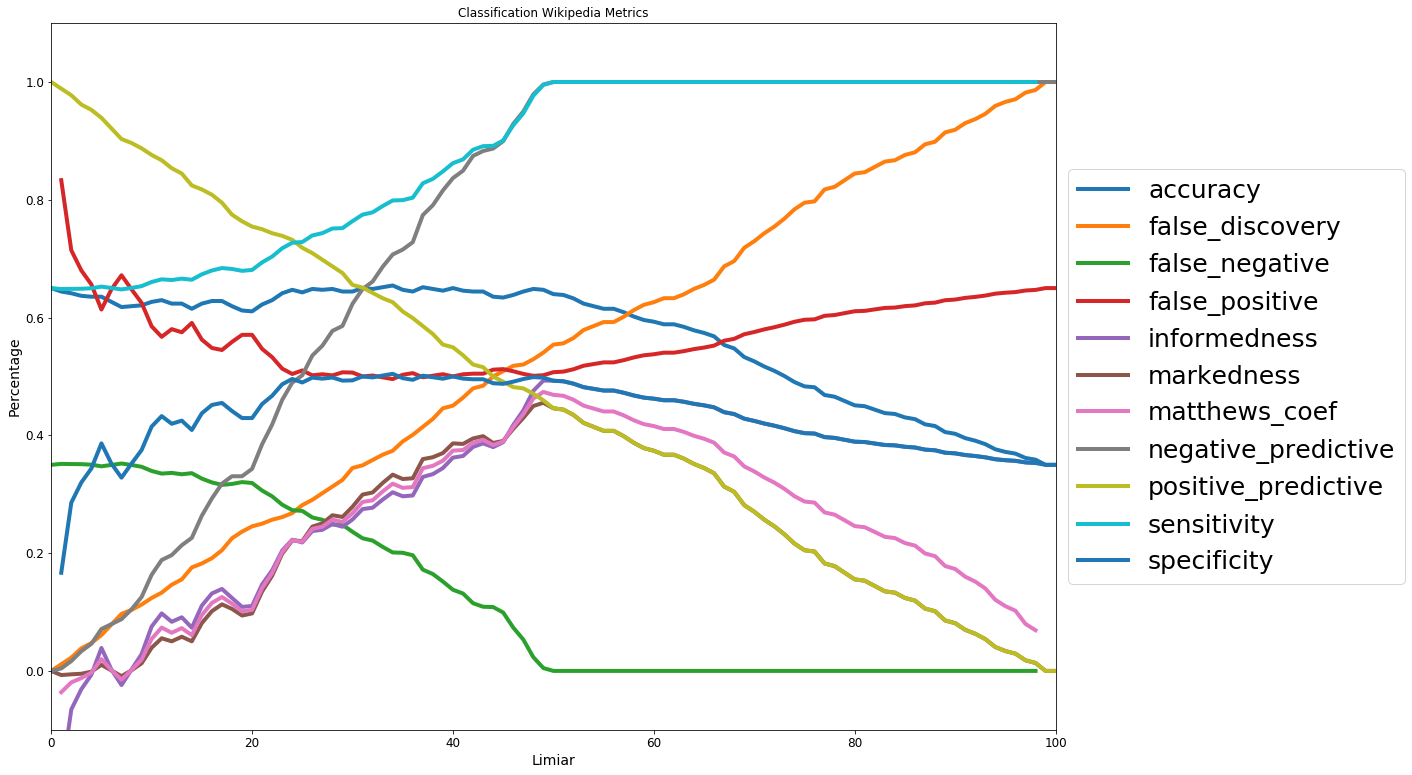

In [27]:
WikipediaTest.drop('f1_score',axis=1).plot(figsize=(18,13),linewidth=4);
plt.ylim((-.1,1.1));
plt.xlim((0,100));
plt.xlabel('Limiar');
plt.ylabel('Percentage')
plt.title('Classification Wikipedia Metrics');
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize=25);

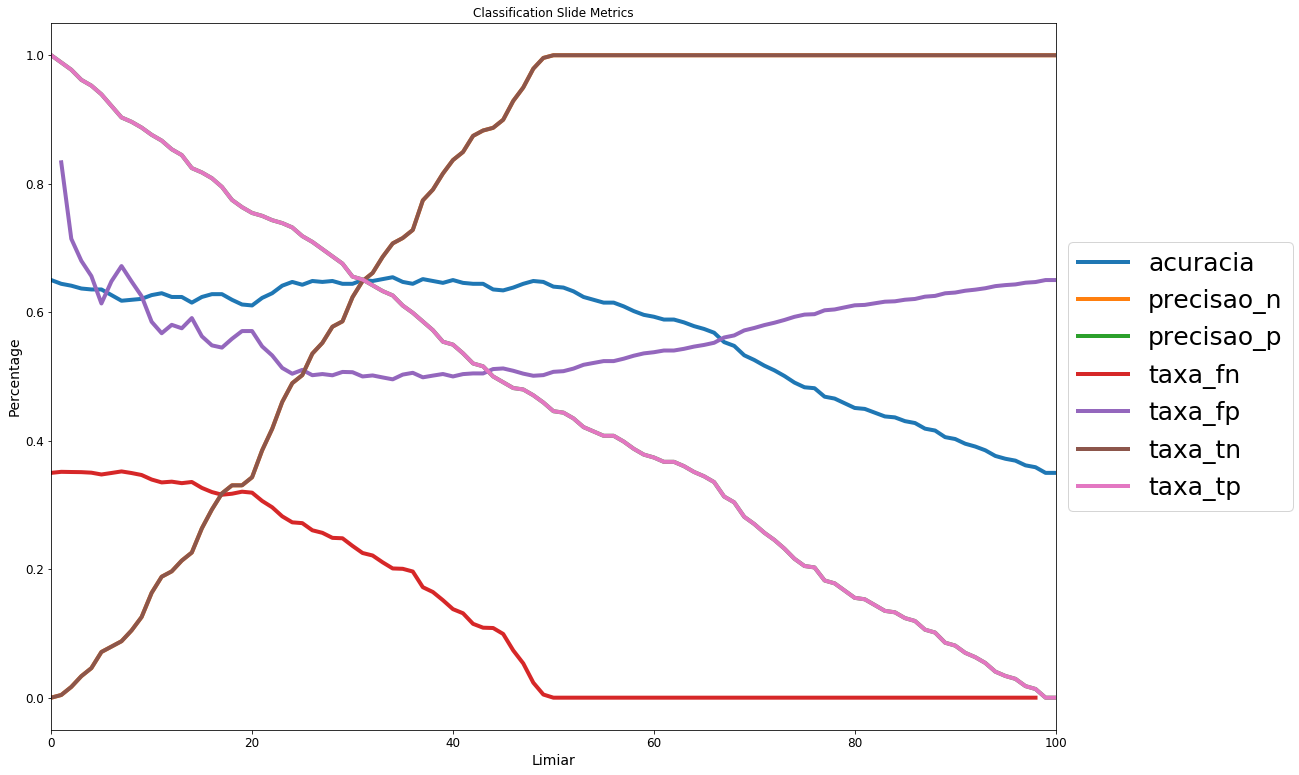

In [28]:
LimiarTest.drop(['limiar'],axis=1).plot(figsize=(18,13),linewidth=4);
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize=25);
plt.xlabel('Limiar');
plt.ylabel('Percentage')
plt.title('Classification Slide Metrics');
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize=25);

<b> e. Caso você precise interpretar a saída de forma a reduzir a ocorrência de FNs (diagnostica como boa uma pessoa com câncer), o que você faria? Mostre como ficaria a nova Matriz de Confusão, analise e explique as mudanças ocorridas. </b>

In [680]:
LimiarTest[LimiarTest['acuracia']==LimiarTest['acuracia'].max()]

,acuracia,confusion,limiar,precisao_n,precisao_p,taxa_fn,taxa_fp
34,0.654466,"[[278, 166], [70, 169]]",0.34,0.707113,0.626126,0.201149,0.495522


$\text{Original}, limiar=0.5\\
\text{Confusão} = 
\begin{bmatrix}
    198 & 246 \\
    0 & 239
\end{bmatrix},
Taxa_{FP} = 50.72\%,
Taxa_{FN} = 0.00\%
$

$\text{Melhor acuracia}, limiar=0.34\\
\text{Confusão} = 
\begin{bmatrix}
    278 & 166 \\
    70 & 169
\end{bmatrix},
Taxa_{FP} = 20.12\%,
Taxa_{FN} = 49.55\%
$

Embora a melhor acurácia seja a de $limiar = 0.34$, ela apresenta uma taxa de falsos negativos muito alta (49.55%) quando comparada à minha estratégia incial - $limiar = 0.5$ e taxa de falsos negativos de 0%. Com esses dados e esse modelo, nosso teste assumindo limiar de 0.5 poderá ser chamado teste verificador de ausência de cancer, de forma que caso o teste for negativo o paciente poderá ter a tranquilidade de uma vida próspera, caso contrário embora haja a chance de ser um falso positivo para presença de cancer aponta-se a necessidade de ter uma examinação mais profunda para analisar outros parâmetros para uma nova avaliação.